In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree

В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

In [2]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Получите данные и загрузите их в рабочую среду

In [3]:
data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


2. Проведите первичный анализ.  
    a.Проверьте данные на пропуски. Удалите в случае обнаружения.

In [4]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

b.*Нормализуйте один из признаков.

In [5]:
sns.set_theme(rc={'figure.figsize':(12,8)})

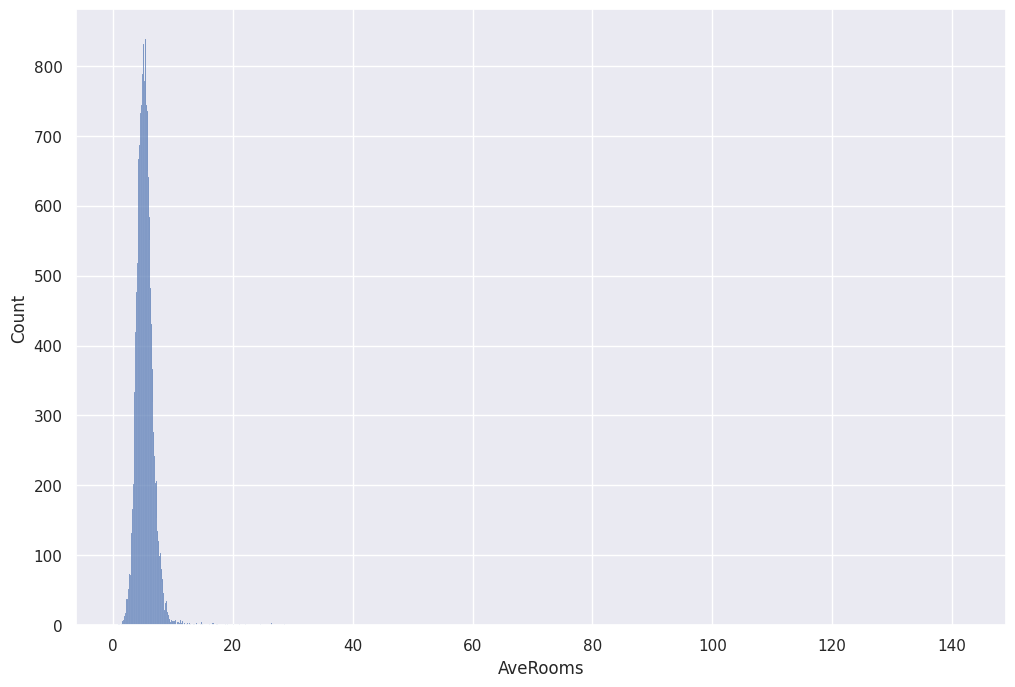

In [6]:
sns.histplot(data=df, x='AveRooms')
plt.show()

In [7]:
log_ave_rooms = np.log(df['AveRooms'])

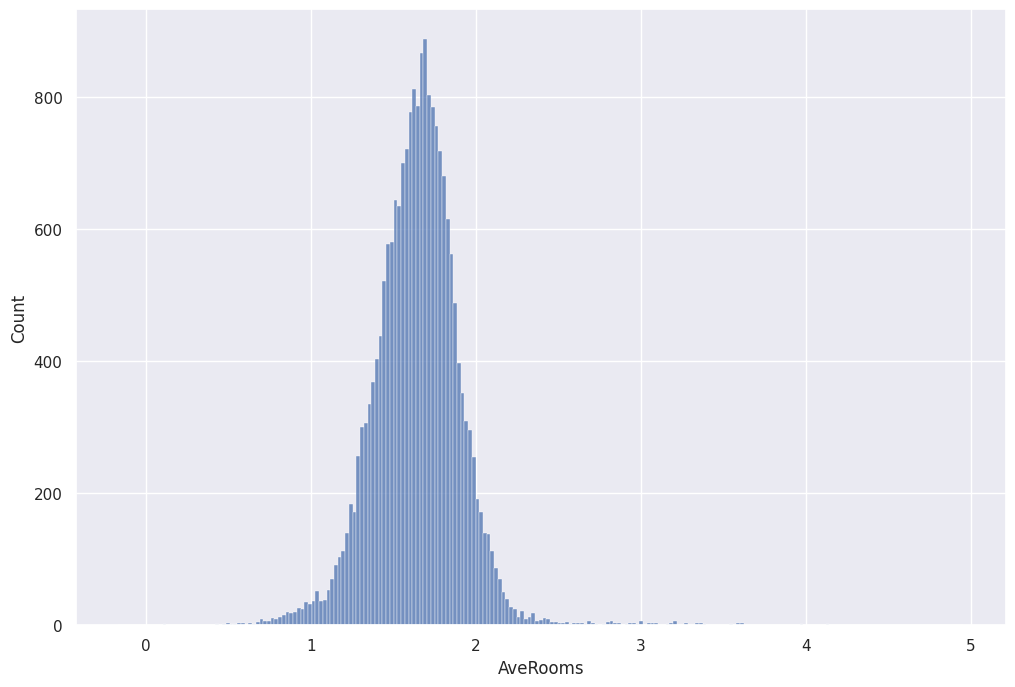

In [8]:
sns.histplot(data=log_ave_rooms)
plt.show()

Признак нормализовался не совсем успешно, хоть и стал ближе к нормальному распределению. С MinMax-скейлингом результат получился хуже, из ноутбука исключен.

In [9]:
df['AveRooms'] = log_ave_rooms

3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [10]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Обучите [модель регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на обучающем множестве.

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model.score(X_train, y_train)

0.6110199251565378

5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [14]:
model.score(X_test, y_test)

0.5747512204883862

6. Обучите [дерево решений](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) на обучающем множестве.

In [15]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [16]:
model.score(X_train, y_train)

1.0

a. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [17]:
model.score(X_test, y_test)

0.6222544018450675

b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по [ссылке](https://mljar.com/blog/visualize-decision-tree/).

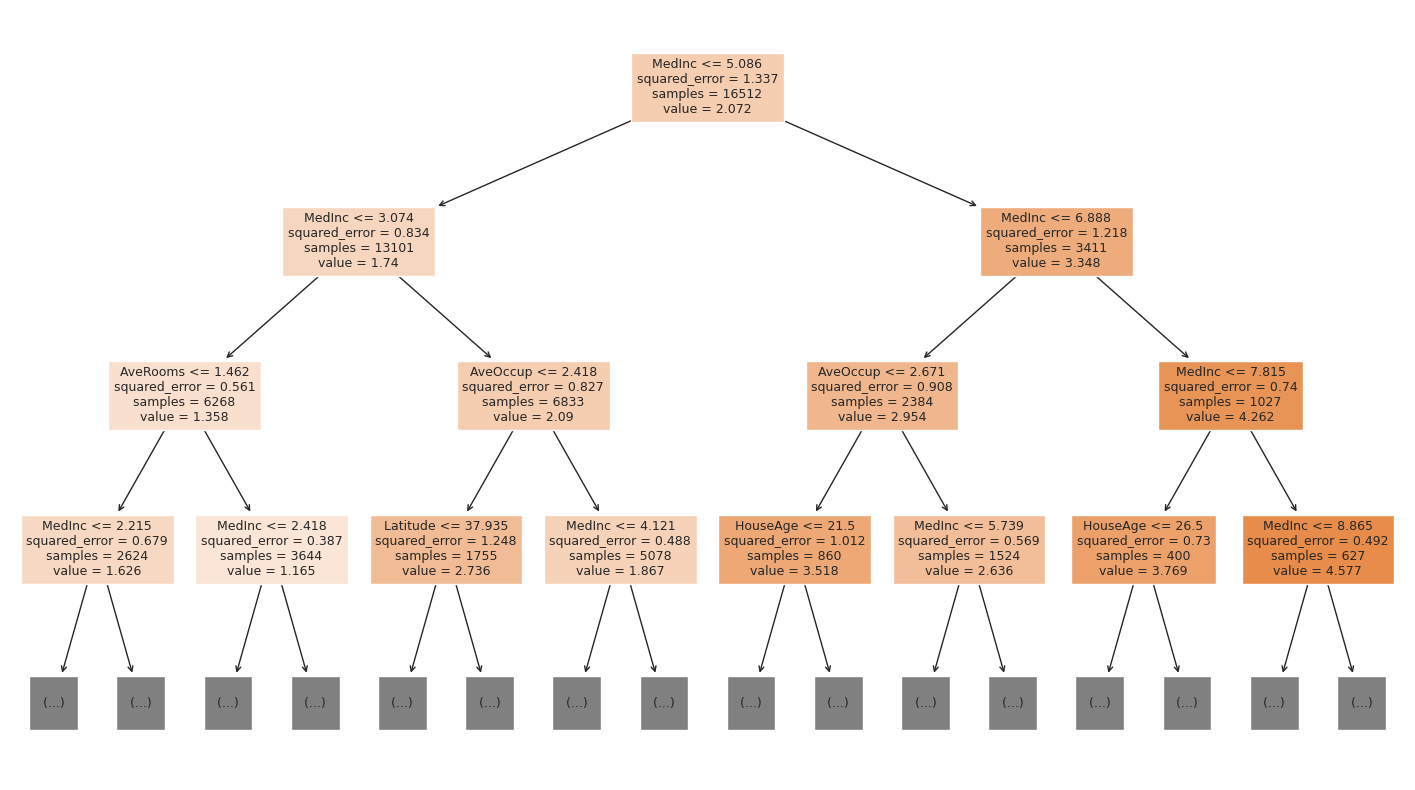

In [18]:
fig, ax = plt.subplots(figsize=(18, 10))
plot_tree(model, max_depth=3, feature_names=X_train.columns, filled=True, fontsize=9, ax=ax)
plt.show()

7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

In [19]:
model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=3, random_state=42)

In [20]:
model.score(X_train, y_train)

0.7579580863586469

a. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [21]:
model.score(X_test, y_test)

0.6808991963313982

Деревья решений имеют более высокую точность по сравнению с моделью линейной регрессии, но склонно к переобучению, большой разрыв метрики точности на обучении и на тесте. Разрыв можно значительно уменьшить и при этом увеличить точность на тесте при работе с параметрами дерева решений, что намного проще по сравнению с моделью линейной регрессии, где нужна более тщательная работа с признаками. Помимо этого дерево решений работает и с категориальными, и с числовыми признаки, в отличие от линейной модели.